# Import Modules

In [1]:
# Basics
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Plotting
import matplotlib.pyplot as plt

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Preparing Data

In [2]:
# Preparing Data
df = pd.read_csv('data/shelter_occupancy_b4_fitting.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Independent variables are shelter data (capacity, day of the week, location, weather, etc.)
X = df.loc[:, 'CAPACITY':'Week_Day_WED']

# Dependent variable is weather a shelter is full (1 indicates a shelter is full, 0 indicates otherwise)
y = df.OCCUPANCY_LEVEL

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Fitting Models with optimum hyper-parameters
## Simple Fitting

In [59]:
# Fitting a Random Forest model with the optimum hyper-parameters tested previously.
# Data is not PCA treated
rf = RandomForestClassifier(n_estimators=10, max_depth=14)
rf.fit(X_train, y_train)
print(f"Simple Fitting Accuracy: {rf.score(X_test, y_test)}")

Simple Fitting Accuracy: 0.7091174299040176


## Fitting with GridSearch Cross Validation

In [60]:
# Fitting different Random Forest models
pipe_rf = Pipeline([('scale', StandardScaler()), ('model', RandomForestClassifier())])

param_rf = [{'scale':[StandardScaler(), None], 'model':[RandomForestClassifier(n_estimators=10, max_depth=14)]}]

grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5)
grid_rf_fitted = grid_rf.fit(X_train, y_train)

grid_rf_fitted.score(X_test, y_test)

0.7149340008283661

In [64]:
# Printing out the feature importance of each feature
feature_importances = sorted(zip(rf.feature_importances_, X.columns), reverse=True)

## Bar chart showing the importance of each feature

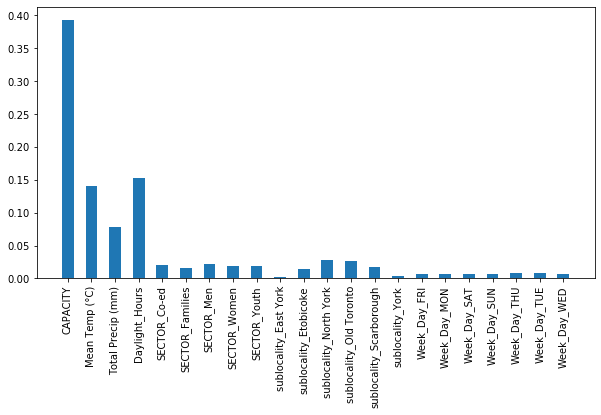

In [62]:
plt.figure(figsize=(10, 5))
plt.bar(X.columns, rf.feature_importances_, width = 0.5)
plt.xticks(rotation=90)
plt.show()

As the bar chart above shows, the most important feature in determining whether a shelter program is full on a certan day is their capacity. The top 4 features are the capacity of a program and the 3 weather related features (temperature, precipitation, daylight hours) on the day of occupation.

## Capacity Histogram

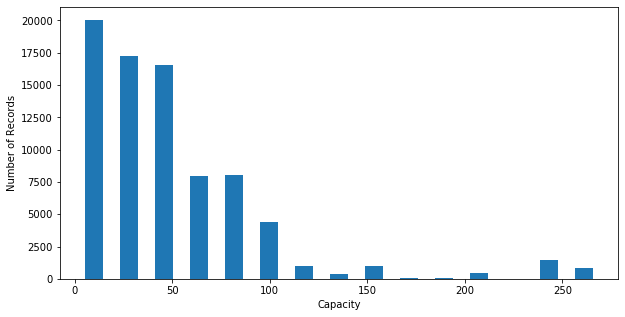

In [83]:
plt.figure(figsize=(10,5))
plt.hist(df.CAPACITY, bins=15, rwidth=0.5)
plt.xlabel('Capacity')
plt.ylabel('Number of Records')
plt.show()

In [113]:
print(f'The majority of the records are below {df.CAPACITY.quantile(0.5)}')

The majority of the records are below 40.0


## Capacity Scatter Plot

In the scatter plot below, X is the capacity of a shelter program and y is the occupancy level (fullness). It does not show a clear pattern.

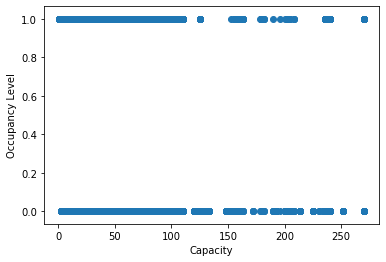

In [7]:
plt.figure()
plt.scatter(df.CAPACITY, df.OCCUPANCY_LEVEL)
plt.xlabel('Capacity')
plt.ylabel('Occupancy Level')
plt.show()